Подключение библиотек

In [15]:
import pandas as pd # Анализ данных
import numpy as np  # Поддержка многомерных массивов
import seaborn as sns
import matplotlib.pyplot as plt # Интерфейс визуализаций
from sklearn import preprocessing

Чтение датасета

In [16]:
df = pd.read_csv("train.csv")

C:\Users\artem\AppData\Local\Temp\ipykernel_11980\2292805398.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,145

Просмотр данных о датасете (кол-во строк и столбцов)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


Просмотр пропущенных значений

<Axes: >

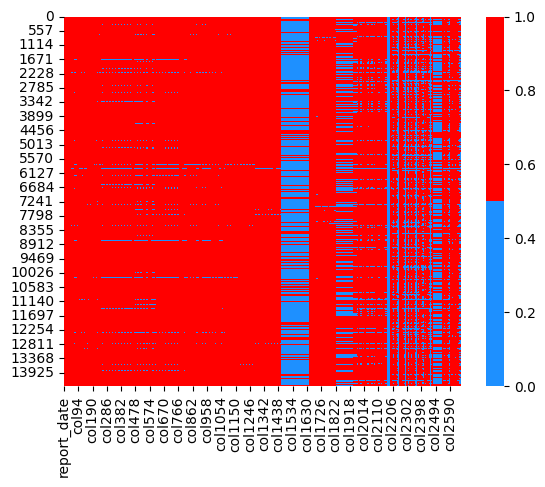

In [18]:
# Тепловая карта пропущенных значений
cols = df.columns # Все столбцы

# красный цвет - пропущенные данные, синий - не пропущенные
colours = ['#1E90FF', '#FF0000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Удаление столбцов, где пропущенных значений более 10%, дубликатов, незаполненных строк и вывод тепловой карты

In [19]:
# Удаление столбцов с более чем 10% пропущенных значений
threshold = 0.1 * len(df)  # 10% от общего количества строк
df = df.dropna(axis=1, thresh=len(df) - threshold)

# Удаление незаполненных строк
df = df.dropna()  # Удаляем строки, в которых есть хотя бы одно пропущенное значение

# Проверка и удаление дубликатов
df = df.drop_duplicates()  # Удаляем дубликаты

In [20]:
# Удаление столбцов с типом данных object
df = df.select_dtypes(exclude=['object'])

<Axes: >

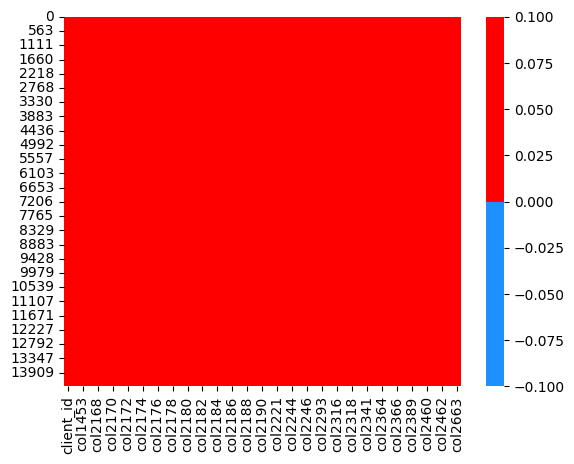

In [21]:
# Тепловая карта пропущенных значений
cols = df.columns # Все столбцы

# красный цвет - пропущенные данные, синий - не пропущенные
colours = ['#1E90FF', '#FF0000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [22]:
df.info()   #Просмотр обновленной информации

<class 'pandas.core.frame.DataFrame'>
Index: 13373 entries, 0 to 14455
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  13373 non-null  int64  
 1   target     13373 non-null  int64  
 2   col1453    13373 non-null  int64  
 3   col2167    13373 non-null  float64
 4   col2168    13373 non-null  float64
 5   col2169    13373 non-null  float64
 6   col2170    13373 non-null  float64
 7   col2171    13373 non-null  float64
 8   col2172    13373 non-null  float64
 9   col2173    13373 non-null  float64
 10  col2174    13373 non-null  float64
 11  col2175    13373 non-null  float64
 12  col2176    13373 non-null  float64
 13  col2177    13373 non-null  float64
 14  col2178    13373 non-null  float64
 15  col2179    13373 non-null  float64
 16  col2180    13373 non-null  float64
 17  col2181    13373 non-null  float64
 18  col2182    13373 non-null  float64
 19  col2183    13373 non-null  float64
 20  col2184    

Кодирование и вывод корреляционной матрицы

In [23]:
# Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == 'object': #object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки

<Axes: >

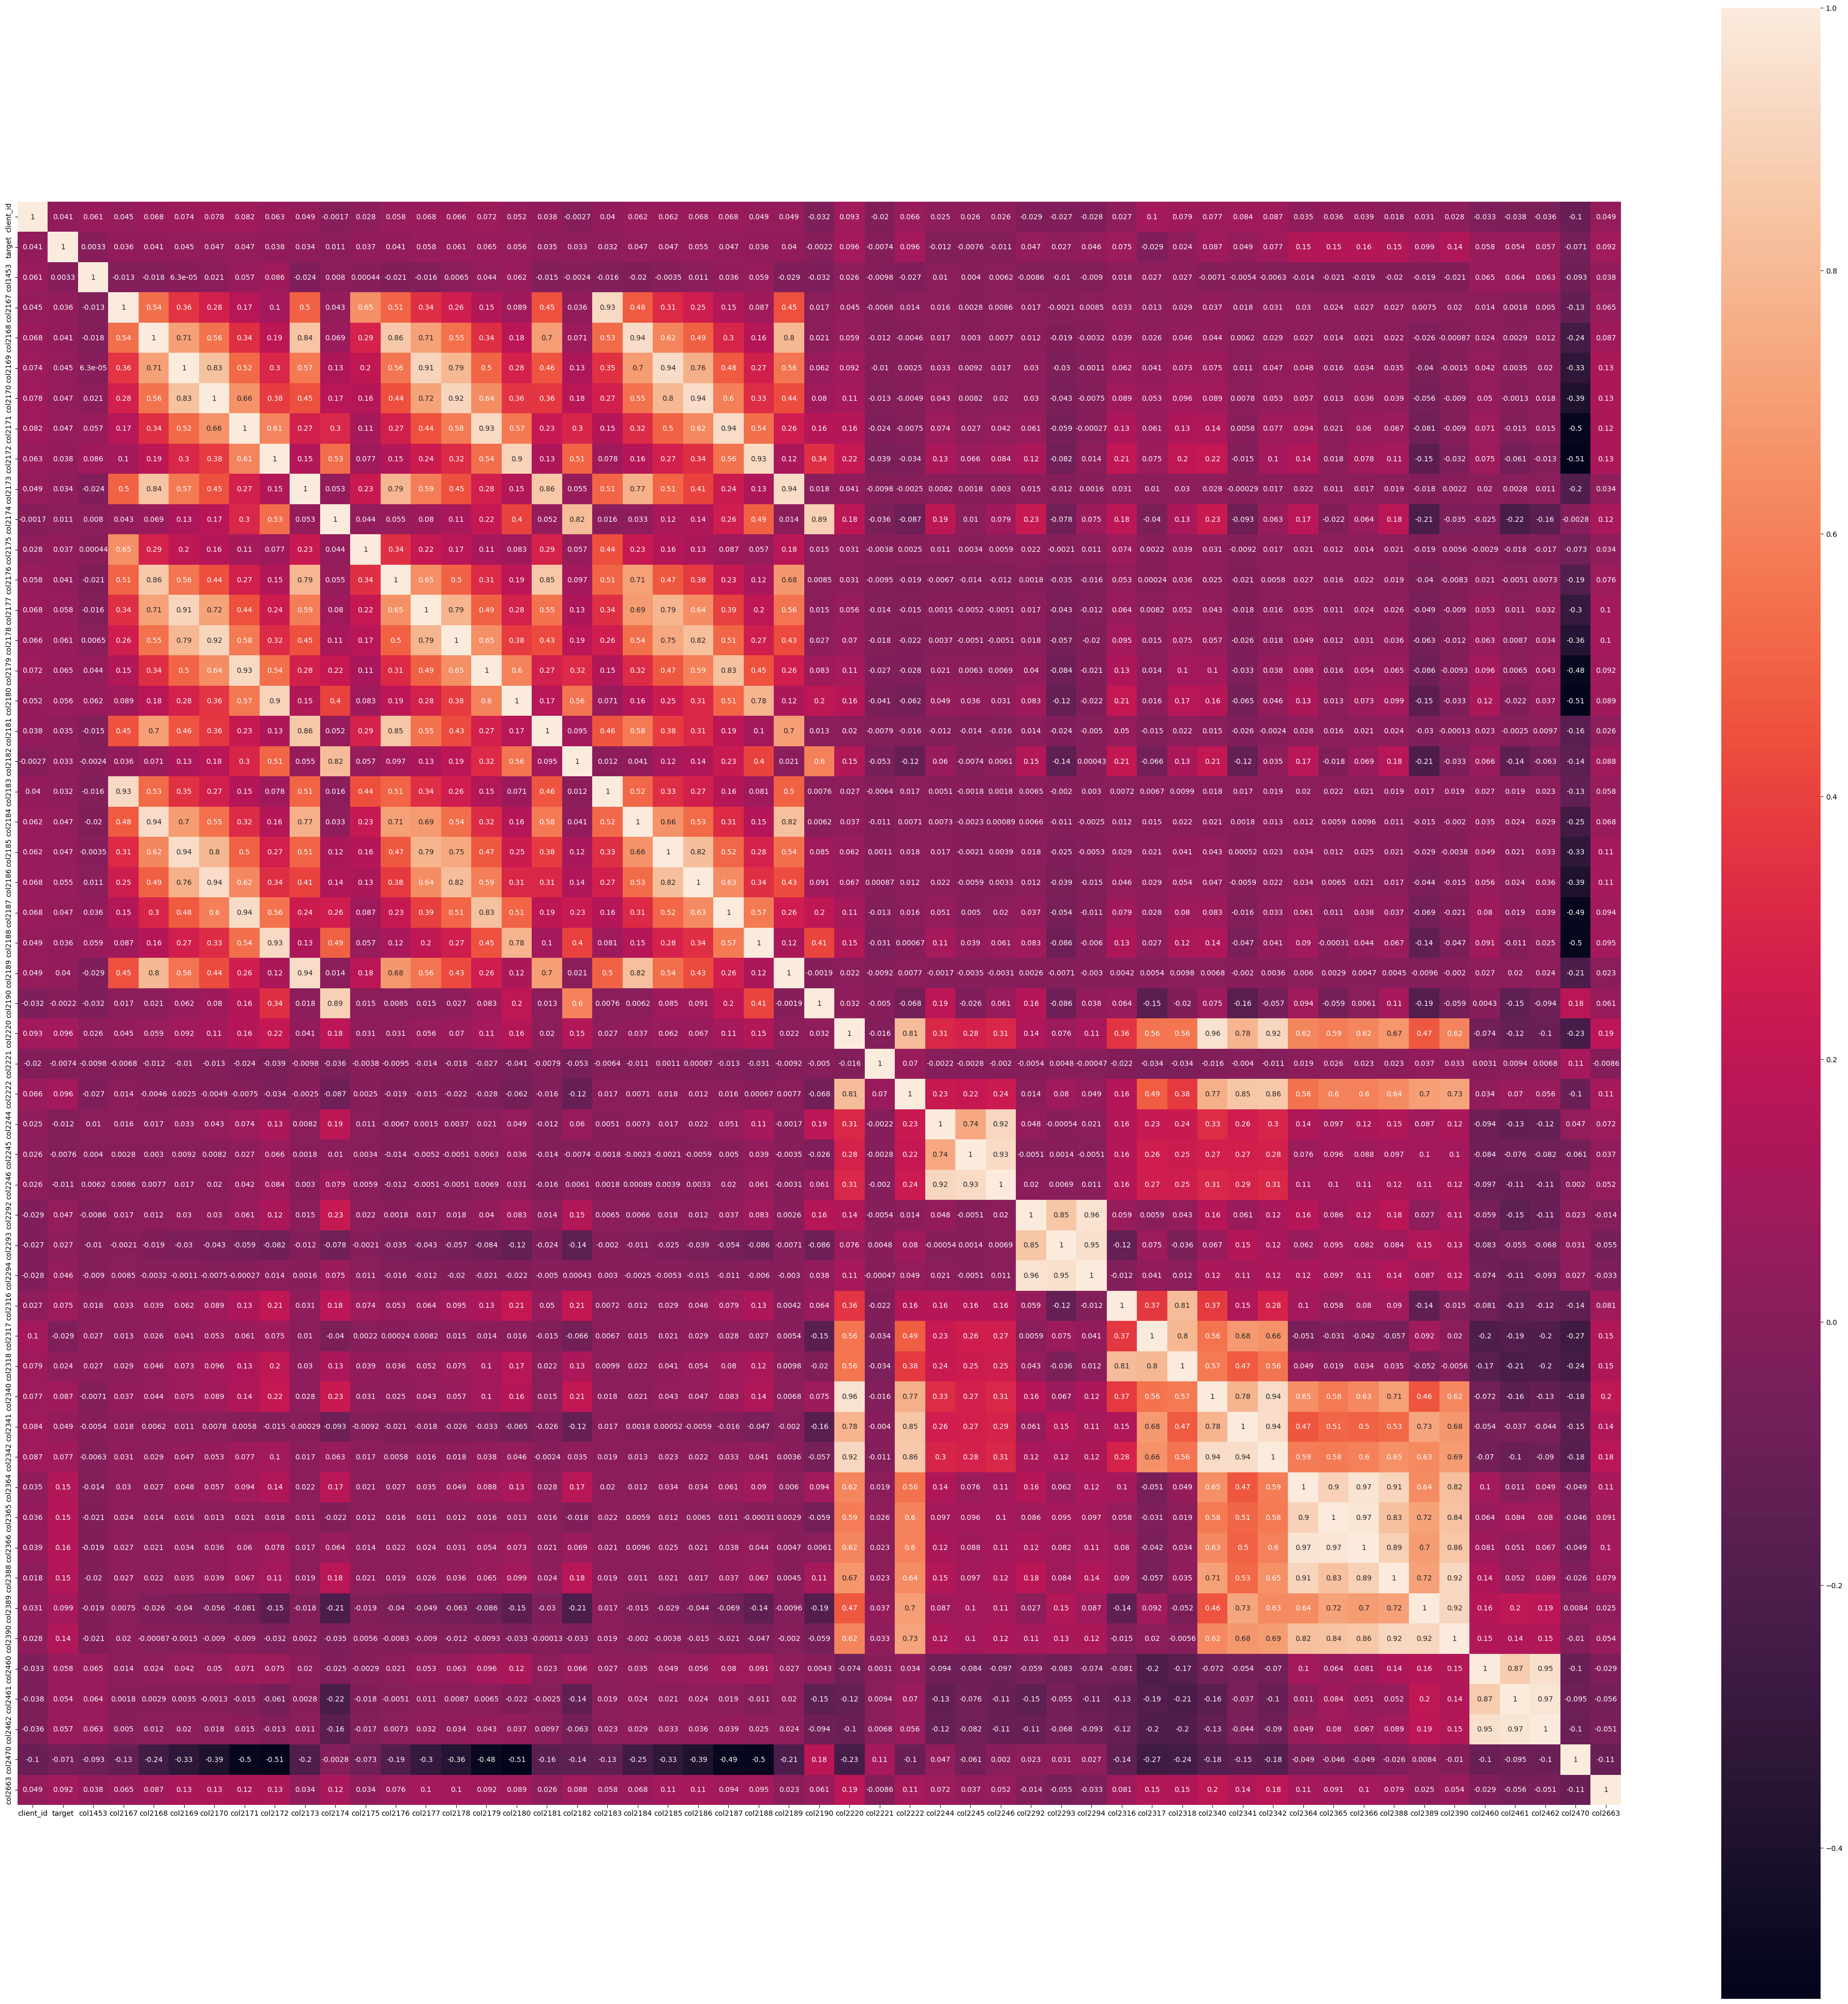

In [24]:
plt.figure(figsize = (50,50))
encoded_data, encoders = number_encode_features(df)

sns.heatmap(encoded_data.corr(), square=True, annot=True)

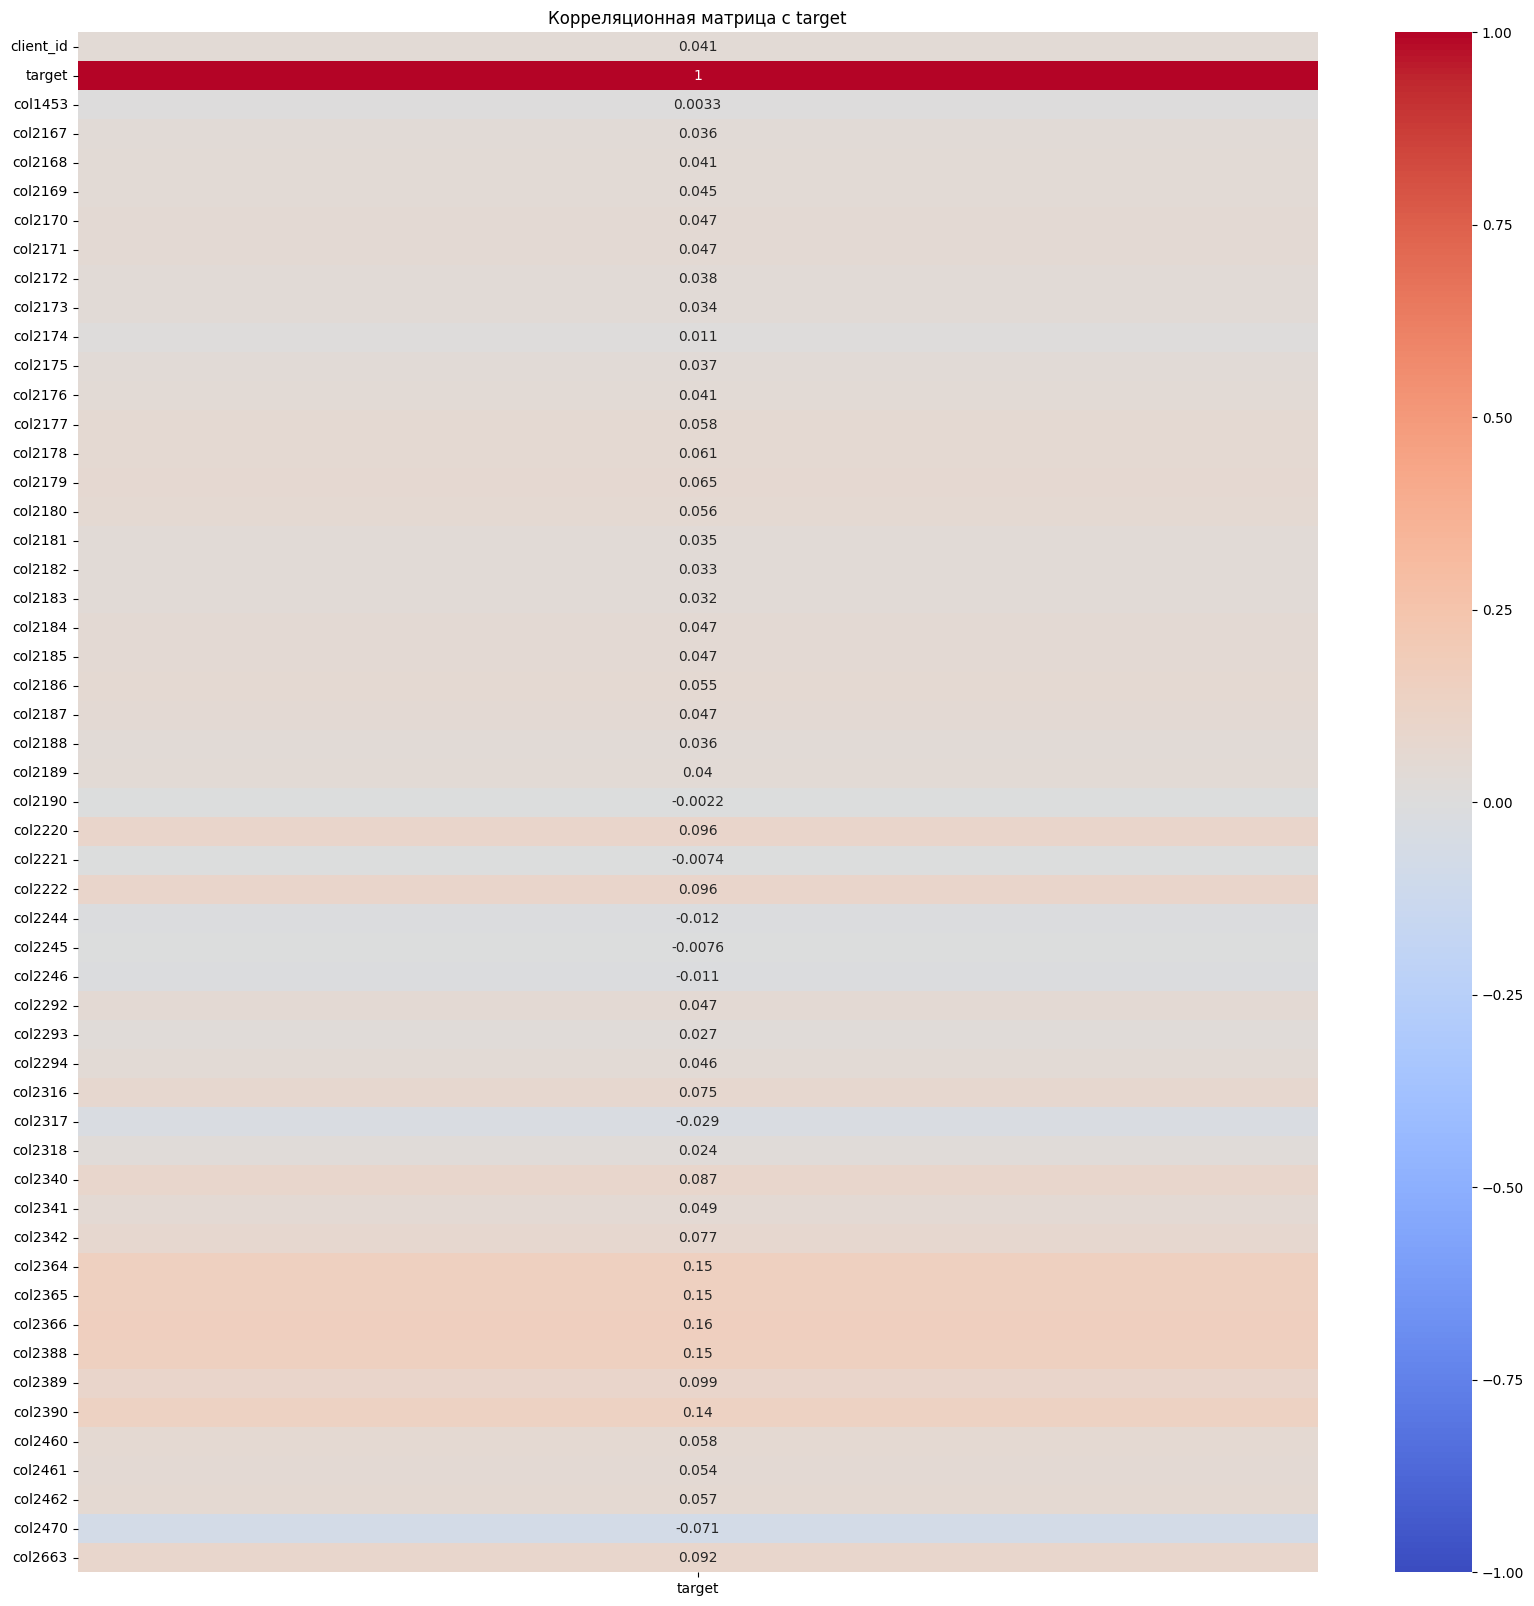

In [25]:
encoded_data, encoders = number_encode_features(df)

# Вычисляем корреляцию
correlation_matrix = encoded_data.corr()

# Создаем тепловую карту
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix[['target']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Настраиваем заголовок
plt.title('Корреляционная матрица с target')
plt.show()

In [26]:
# Вычисляем корреляционную матрицу
correlation_matrix = df.corr()

# Получаем корреляцию с целевой переменной
correlation_with_target = correlation_matrix['target']

# Отбираем признаки с положительной или нулевой корреляцией
positive_features = correlation_with_target[correlation_with_target >= 0].index.tolist()

# Удаляем признаки с отрицательной корреляцией
df = df[positive_features]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13373 entries, 0 to 14455
Data columns (total 46 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  13373 non-null  int64  
 1   target     13373 non-null  int64  
 2   col1453    13373 non-null  int64  
 3   col2167    13373 non-null  float64
 4   col2168    13373 non-null  float64
 5   col2169    13373 non-null  float64
 6   col2170    13373 non-null  float64
 7   col2171    13373 non-null  float64
 8   col2172    13373 non-null  float64
 9   col2173    13373 non-null  float64
 10  col2174    13373 non-null  float64
 11  col2175    13373 non-null  float64
 12  col2176    13373 non-null  float64
 13  col2177    13373 non-null  float64
 14  col2178    13373 non-null  float64
 15  col2179    13373 non-null  float64
 16  col2180    13373 non-null  float64
 17  col2181    13373 non-null  float64
 18  col2182    13373 non-null  float64
 19  col2183    13373 non-null  float64
 20  col2184    

In [29]:
df_cleaned = df.to_csv("cleanedTrain.csv", index=False)  # Сохранение в новый файл